# Librerias


In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# Read in the data

Read the data in from the retail sales CSV file in the examples folder then set the index to the 'date' column. We are also parsing dates in the data file.

In [ ]:
passengers_df = pd.read_excel('/content/AirlinePassengerExercise.xlsx', index_col='Date', parse_dates=True)
passengers_df = passengers_df.drop('Year', 1)
passengers_df = passengers_df.drop('trend', 1)
passengers_df = passengers_df.drop('Month', 1)
passengers_df = passengers_df.dropna()

In [ ]:
passengers_df.head()

,Passengers
Date,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


# Prepare for Prophet



In [ ]:
df = passengers_df.reset_index()
df.tail()

,Date,Passengers
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [ ]:
df.head()

,Date,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
df=df.rename(columns={'Date':'ds', 'Passengers':'y'})

In [ ]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


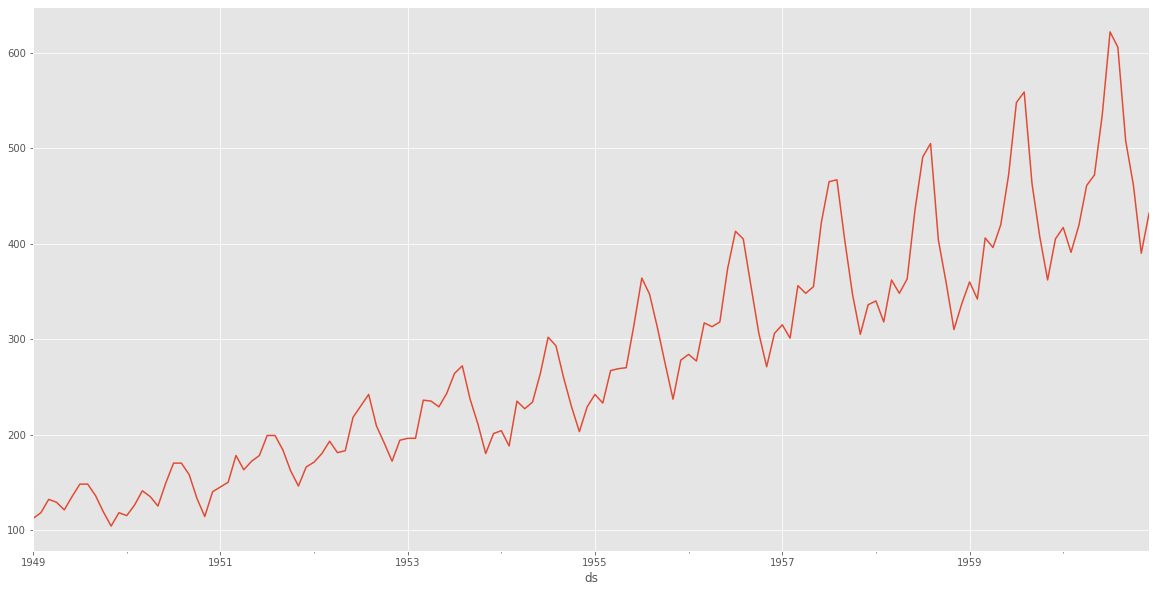

In [ ]:
df.set_index('ds').y.plot()

In [ ]:
df['y'] = np.log(df['y'])

In [ ]:
df.tail()

,ds,y
139,1960-08-01,6.406880
140,1960-09-01,6.230481
141,1960-10-01,6.133398
142,1960-11-01,5.966147
143,1960-12-01,6.068426


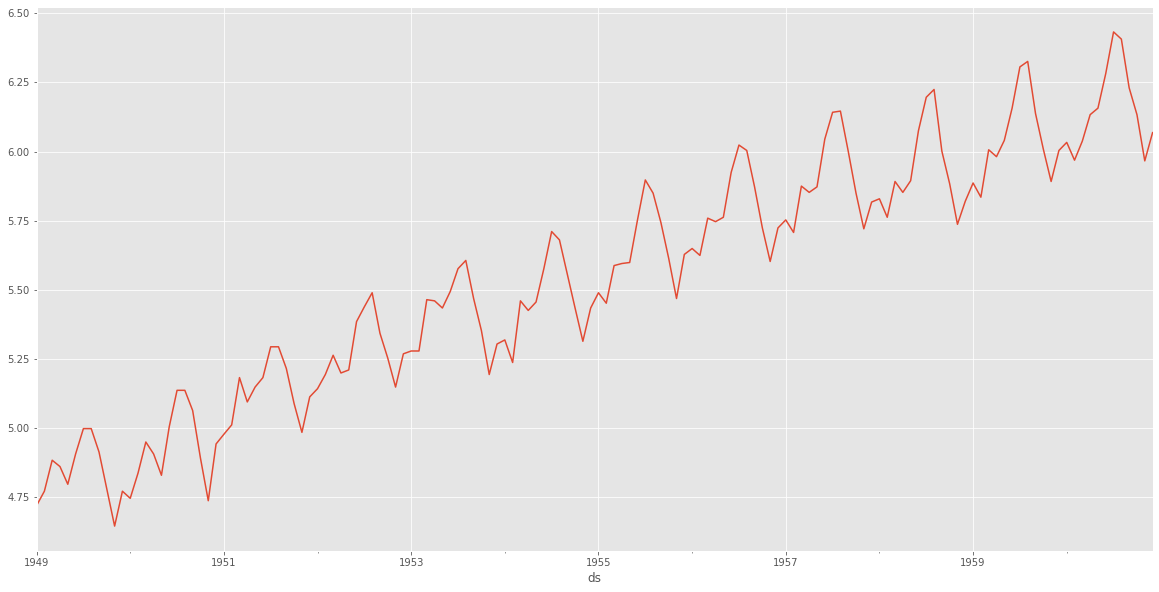

In [ ]:
df.set_index('ds').y.plot()

# Running Prophet



In [ ]:
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
163,1962-07-31
164,1962-08-31
165,1962-09-30
166,1962-10-31
167,1962-11-30


To forecast this future data, we need to run it through Prophet's model.

In [ ]:
forecast = model.predict(future)

The resulting forecast dataframe contains quite a bit of data, but we really only care about a few columns.  First, let's look at the full dataframe:

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
163,1962-07-31,6.382073,6.521734,6.669497,6.321045,6.441238,0.212246,0.212246,0.212246,0.212246,0.212246,0.212246,0.0,0.0,0.0,6.594319
164,1962-08-31,6.391266,6.400570,6.556385,6.325153,6.455142,0.086206,0.086206,0.086206,0.086206,0.086206,0.086206,0.0,0.0,0.0,6.477472
165,1962-09-30,6.400162,6.229407,6.386341,6.328522,6.469514,-0.088821,-0.088821,-0.088821,-0.088821,-0.088821,-0.088821,0.0,0.0,0.0,6.311341
166,1962-10-31,6.409355,6.090639,6.265432,6.333003,6.483077,-0.231169,-0.231169,-0.231169,-0.231169,-0.231169,-0.231169,0.0,0.0,0.0,6.178186
167,1962-11-30,6.418251,6.230769,6.416618,6.337013,6.495668,-0.093370,-0.093370,-0.093370,-0.093370,-0.093370,-0.093370,0.0,0.0,0.0,6.324881


We really only want to look at yhat, yhat_lower and yhat_upper, so we can do that with:

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
163,1962-07-31,6.594319,6.521734,6.669497
164,1962-08-31,6.477472,6.400570,6.556385
165,1962-09-30,6.311341,6.229407,6.386341
166,1962-10-31,6.178186,6.090639,6.265432
167,1962-11-30,6.324881,6.230769,6.416618


# Plotting Prophet results



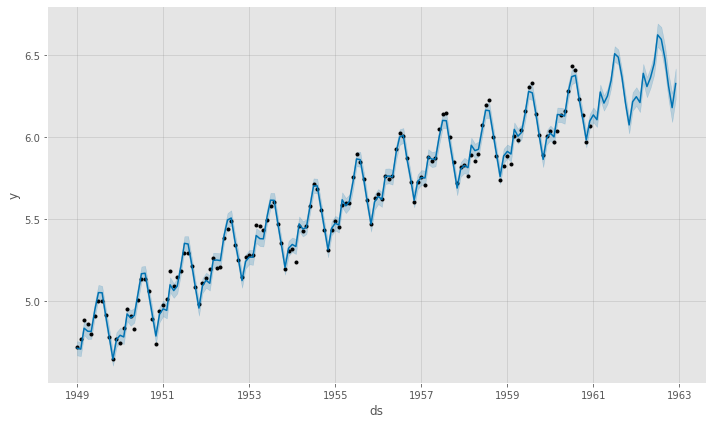

In [ ]:
model.plot(forecast);

# Visualizing Prophet models


In [ ]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [ ]:
viz_df = passengers_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [ ]:
viz_df.head()

,Passengers,yhat,yhat_lower,yhat_upper
1949-01-01,112.0,4.712282,4.667915,4.754372
1949-02-01,118.0,4.706156,4.664058,4.750559
1949-03-01,132.0,4.834043,4.792250,4.882993
1949-04-01,129.0,4.815340,4.767686,4.860046
1949-05-01,121.0,4.814271,4.769109,4.859628


In [ ]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [ ]:
viz_df.head()

,Passengers,yhat,yhat_lower,yhat_upper,yhat_rescaled
1949-01-01,112.0,4.712282,4.667915,4.754372,111.305897
1949-02-01,118.0,4.706156,4.664058,4.750559,110.626146
1949-03-01,132.0,4.834043,4.792250,4.882993,125.718253
1949-04-01,129.0,4.815340,4.767686,4.860046,123.388726
1949-05-01,121.0,4.814271,4.769109,4.859628,123.256937


Let's take a look at the ```sales``` and ```yhat_rescaled``` data together in a chart.

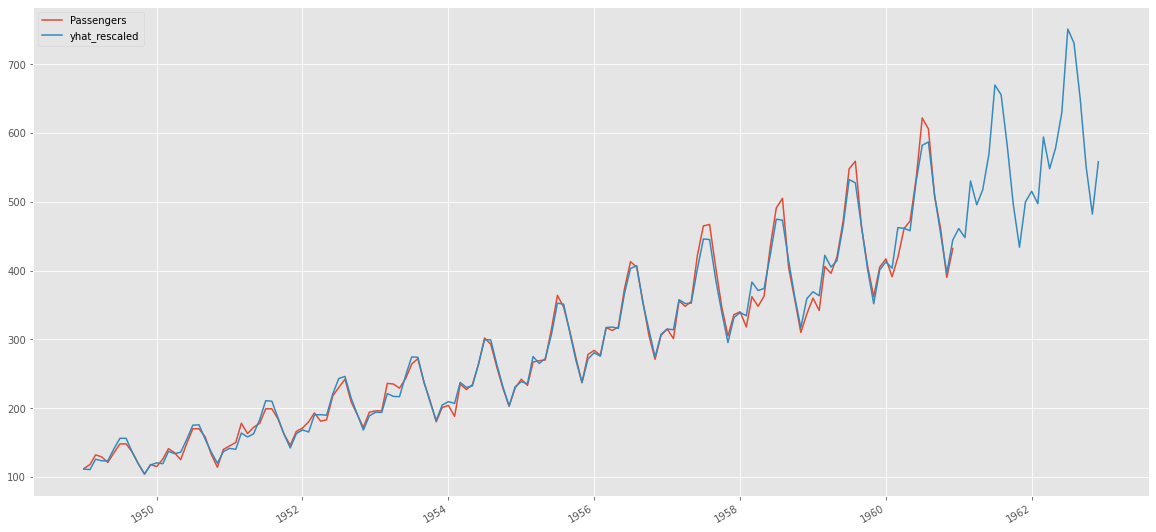

In [ ]:
viz_df[['Passengers', 'yhat_rescaled']].plot()

In [ ]:
passengers_df.index = pd.to_datetime(passengers_df.index)
connect_date = passengers_df.index[-2]

In [ ]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [ ]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1960-12-01,6.202074,6.051133,6.140013,6.202074,6.202074,-0.105038,-0.105038,-0.105038,-0.105038,-0.105038,-0.105038,0.0,0.0,0.0,6.097036
1960-12-31,6.210970,6.088836,6.179562,6.210970,6.210970,-0.077214,-0.077214,-0.077214,-0.077214,-0.077214,-0.077214,0.0,0.0,0.0,6.133756
1961-01-31,6.220163,6.060488,6.148885,6.219561,6.220626,-0.115565,-0.115565,-0.115565,-0.115565,-0.115565,-0.115565,0.0,0.0,0.0,6.104598
1961-02-28,6.228466,6.227204,6.318817,6.226769,6.229938,0.045028,0.045028,0.045028,0.045028,0.045028,0.045028,0.0,0.0,0.0,6.273494
1961-03-31,6.237658,6.159883,6.252673,6.234055,6.240557,-0.031829,-0.031829,-0.031829,-0.031829,-0.031829,-0.031829,0.0,0.0,0.0,6.205829


Now, let's build a dataframe to use in our new visualization. We'll follow the same steps we did before.

In [ ]:
viz_df = passengers_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

Now, if we take a look at the ```head()``` of ```viz_df``` we'll see 'NaN's everywhere except for our original data rows.  

In [ ]:
viz_df.head()

,Passengers,yhat,yhat_lower,yhat_upper,yhat_scaled
1949-01-01,112.0,NaN,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN,NaN
1949-03-01,132.0,NaN,NaN,NaN,NaN
1949-04-01,129.0,NaN,NaN,NaN,NaN
1949-05-01,121.0,NaN,NaN,NaN,NaN


If we take a look at the ```tail()``` of the ```viz_df``` you'll see we have data for the forecasted data and NaN's for the original data series.

In [ ]:
viz_df.tail()

,Passengers,yhat,yhat_lower,yhat_upper,yhat_scaled
1962-07-31,NaN,6.594319,6.521734,6.669497,730.930917
1962-08-31,NaN,6.477472,6.400570,6.556385,650.325061
1962-09-30,NaN,6.311341,6.229407,6.386341,550.783181
1962-10-31,NaN,6.178186,6.090639,6.265432,482.116364
1962-11-30,NaN,6.324881,6.230769,6.416618,558.291527


## time to plot

Now, let's plot everything to get the 'final' visualization of our sales data and forecast with errors.

Text(0.5, 0, 'Date')

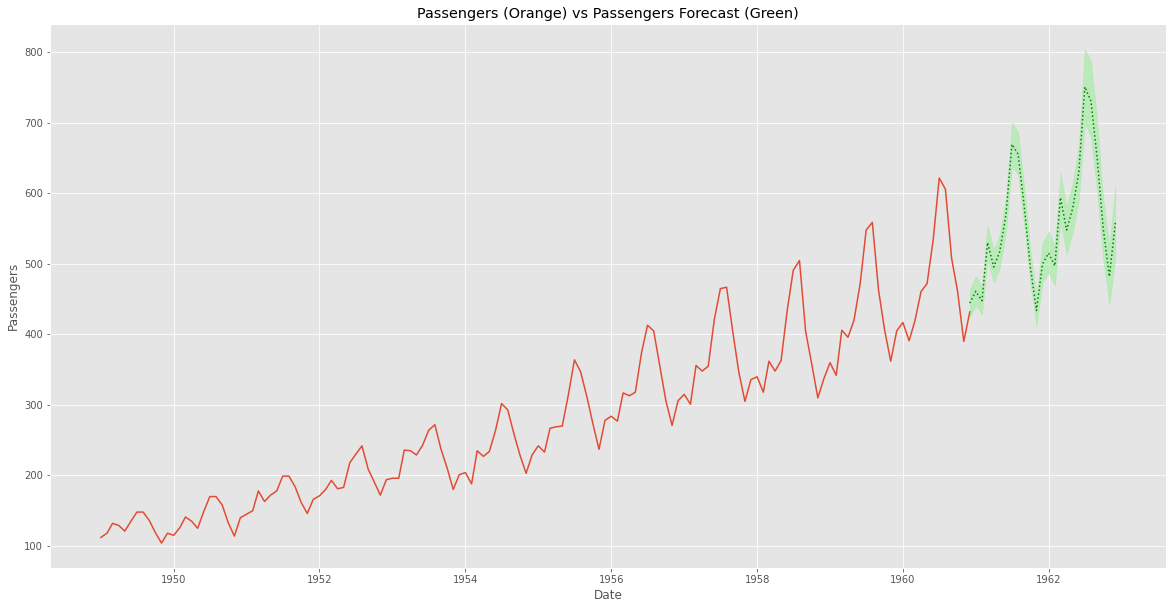

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.Passengers)
ax1.plot(viz_df.yhat_scaled, color='green', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='lightgreen')
ax1.set_title('Passengers (Orange) vs Passengers Forecast (Green)')
ax1.set_ylabel('Passengers')
ax1.set_xlabel('Date')

This visualization is much better (in my opinion) than the default fbprophet plot. It is much easier to quickly understand and describe what's happening. The orange line is actual sales data and the black dotted line is the forecast. The gray shaded area is the uncertaintity estimation of the forecast.